# Projeto 2

Este notebook relata todos os passos e achados da análise dos dados sobre os passageiros do RMS Titanic.
Números superescritos refletem as referências linkadas na seção VII, "Referências".

### I. Dados
Os dados representam características<sup>2</sup> dos passageiros do Titanic, à saber:

- número de identificação, 
- sexo, 
- idade, 
- presença de irmãos/cônjugues à bordo,
- presença de pais/filhos à bordo,
- local de embarcação, 
- cabine, 
- se sobreviveu ao naufrágio ou não

E também características de seus *tickets*, à saber:
- número 
- tarifa
- classe


### II. Perguntas
Foram feitas as seguintes perguntas:

1. **Quais fatores fizeram com que algumas pessoas fossem mais propensas a sobreviver?  \* *recomendação do curso***


2. **Qual o perfil dos passageiros de cada embarcação?**


3. **Quais familias sobreviveram ao incidente?**


Para checar os passos usados para responder às perguntas, ver a seção V, "Código".

### IV. Conclusões

Os fatores relacionados a uma maior chance de sobrevivência foram, em menor grau, a idade e, em maior grau, o sexo e a classe social (inferida pela classe do passaporte). No contexto imigratório do Titanic, a classe social se relaciona com número de familiares à bordo, que também parece ter afetado a chance de sobrevivência ao naufrágio.

Entre sobreviventes e não sobreviventes, as diferenças na média de idade são discretas (menos 3 anos para os sobreviventes), mas a distribuição da idade ilustra que havia maior frequência de crianças dentre os sobreviventes:

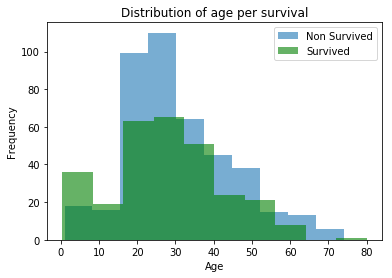

A proporção de homens que morreram foi muito maior (85%), isso sem contar os homens da tripulação:

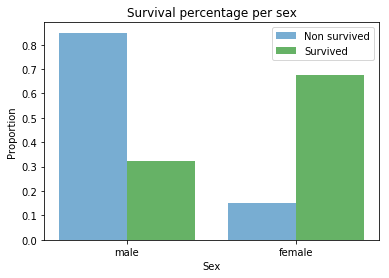

Os passageiros da primeira classe mantiveram uma proporção similar entre sobreviventes e mortos. No entanto, a terceira classe a maior proporção são de mortos (68%):

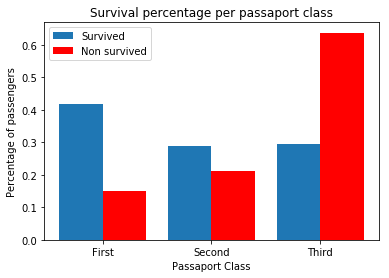

A terceira classe era composta de passageiros que mais traziam familiares consigo (82% de irmãos/cônjugues e 79% de pais/filhos), conforme o gráfico abaixo:

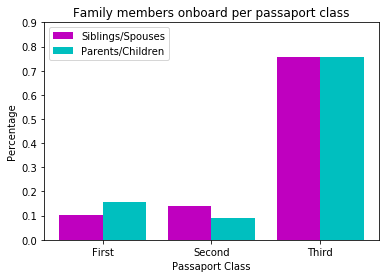

O fato de mulheres e crianças embarcarem primeiro nos bote salva-vidas pode explicar essa diferença entre os sexos. A média da idade de sobreviventes diminui com mais crianças sendo salvas. O público mais vulnerável eram homens da terceira classe. A terceira classe teve os maiores números de mortos provavelmente por conta do grande número de familiares e de, possivelmente, um isolamento no navio colocado pela política imigratória dos EUA, dificultando sua circulação/evasão.

Em todas as embarcações haviam mais homens do que mulheres, na faixa dos 30 anos: 

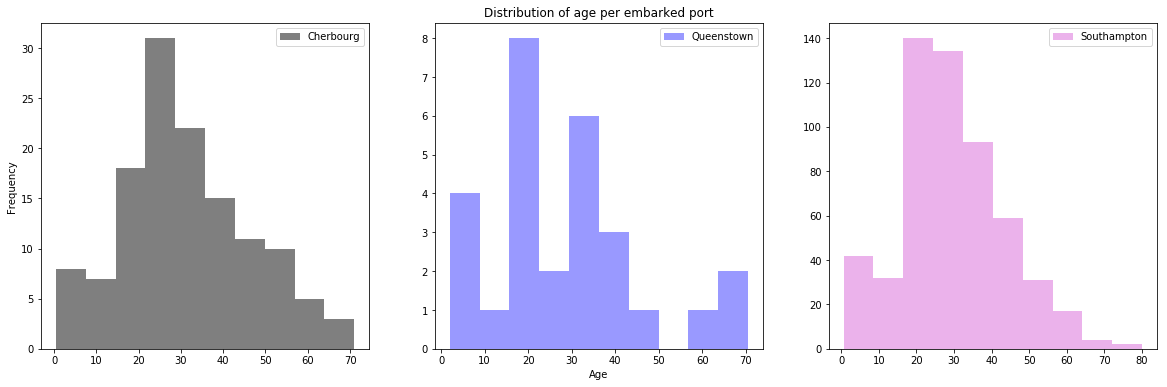

Todas as embarcações apresentaram passageiros na faixa dos 30 anos, tendo mais homens do que mulheres. Em Southampton, os passageiros eram em maior número, distribuidos nas três classes de modo relativamente equilibrado. Os passageiros de Queenstown estavam em menor número, quase integralmente da terceira classe e com a maior proporção de crianças das três embarcações, possivelmente grande parte eram imigrantes indo para os EUA. Mais de 60% dos passageiros de Southampton e Queenstown não sobreviveram. Cherbourg trazia passageiros em quantidade média, tendo a maior proporção de primeira classe e de sobreviventes (mais da metade) de todas as embarcações. Em linhas gerais, Southampton possuia um publico maior, mais heterogêneo; Queenstown um público menor, mas majoritariamente imigrantes e Cherbourg trazia as classes sociais mais elevadas, que foram os que mais sobreviveram.

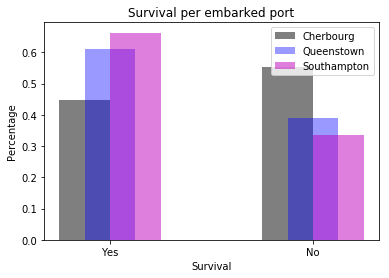


Porcentagem de classe de passaporte por embarcação:

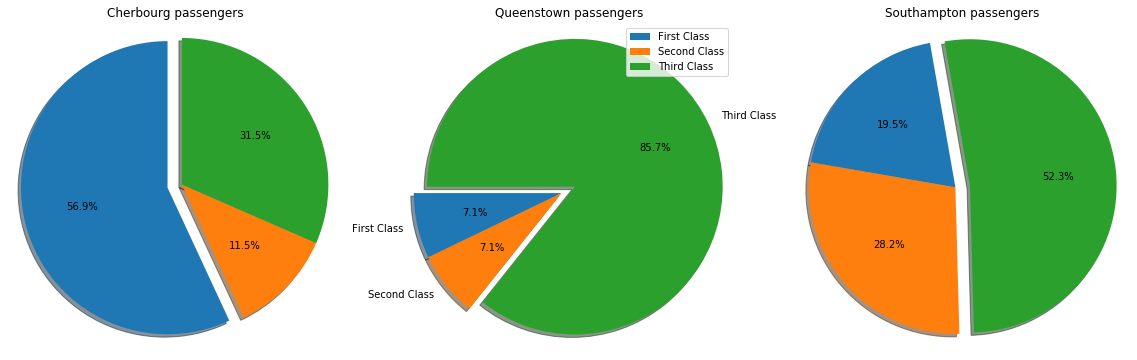

Por fim, cerca de 1/3 das famílias representadas no Titanic pode sobreviver integralmente ao incidente. Do restante das famílias, pelo menos 1 integrante não sobreviveu.

### V. Limitações e Transformações

O conjunto de dados importado apresentou rótulos com iniciais maiúsculas, e foram renomeados de acordo com as convenções apresentadas no curso. Os dados de idade, cabine e embarcação apresentaram valores ausentes/nulos. Nenhuma análise foi realizada com os dados de cabine, por conta do excesso de NaNs (687). Assim, essa coluna foi descartada com *drop()*, o que limitou a análise dos dados dessa perspectiva das cabines. Já com os dados de idade e embarcação, a quantidade de NaNs foi menor (177 e 2, respectivamente). Assim, as linhas foram descartadas com *dropna()*, o que diminuiu a amostragem total e pode ter afetado a representatividade dos dados.

Na última pergunta, a análise não considera que famílias diferentes podem ter o mesmo sobrenome, e que muitos passageiros sobreviventes eram os únicos representantes de suas familias, não compondo uma familia "real", no sentido coletivo. 

Não houve necessidade de transformação dos tipos de dados.

### VI. Código

Para consolidar os passos acima, o código: 

**Pergunta 1**
- Importa e traz algumas informações sobre a estrutura geral dos dados;
- Adequa os rótulos seguindo as convenções;
- Cria duas estruturas distintas para sobreviventes e não sobreviventes;
- Cria uma função para calcular proporções de valores únicos das variáveis, entre sobreviventes e não sobreviventes;
- Calcula as distribuições e médias de idade, entre sobreviventes e não sobreviventes (hist);
- Calcula a porcentagem de homens e mulheres, entre sobreviventes e não sobreviventes (bar);
- Calcula a porcentagem das classes de passaporte, entre sobreviventes e não sobreviventes (bar);
- Na estrutura dos não sobreviventes, agrupa as colunas de familiares de acordo com a classe de passaporte (bar);

**Pergunta 2**
- Cria estruturas distintas para passageiros de cada porto de embarque;
- Calcula a proporção de sexo, sobrevivência (bar), classe de passaporte (pie) e a média de idade (hist) de cada embarcação;

**Pergunta 3**
- Cria uma coluna apenas com o primeiro nome (nome de família);
- Cria uma estrutura com número de passageiros por família;
- Cria uma estrutura com sobrevivência dos passageiros por família;
- Itera sobre as duas estruturas criadas para produzir uma lista que o número de sobreviventes coincide com o número de familiares;


**Obs:** O código evitou utilizar valores absolutos e sim valores relativos (proporções), para melhor interpretação dos resultados.


In [25]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importa o csv considerando a coluna ID dos passageiros como rótulo das linhas
df = pd.read_csv('titanic-data-6.csv', index_col = "PassengerId")

# Cabeçalho do DataFrame
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Descreve os dados importados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [27]:
# Substitui os rótulos com letras minúsculas e checa
df.columns = df.columns.str.lower()
df.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [28]:
# Quantifica os valores nulos de cada coluna
df.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

**Obs:** Foi identificada a presença de 2 NaNs na coluna 'embarked', 177 NaNs na coluna 'age' e 687 na coluna 'cabin'. Para o último caso, a coluna toda foi descartada por conter excesso de NaNs. Para os dois primeiros casos, as linhas com NaNs foram descartadas.

In [29]:
# Elimina a coluna da cabine por excesso de NaNs
df.drop('cabin', axis=1, inplace=True)
df.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [30]:
# Exclusão das linhas com NaNs das colunas idade e embarcação
df.dropna(subset=['age', 'embarked'], inplace=True)

In [31]:
# Retorna o shape dos dados
print("O conjunto de dados possui {0} linhas e {1} colunas.".format(df.shape[0], df.shape[1]))

O conjunto de dados possui 712 linhas e 10 colunas.


In [32]:
# Cria a coluna apenas com primeiro elemento dos nomes
df['family'] = df['name'].apply(lambda x: x.split(',')[0])

# Retorna quantidade de valores únicos das famílias 
print("Quantidade de familias: {}".format(df['family'].nunique()))

Quantidade de familias: 533


**Obs:** A quantidade de famílias foi baseada no último sobrenome. Esse número não considera que familias diferentes, eventualmente, podem ter um sobrenome em comum.

## 1. Quais fatores fizeram com que algumas pessoas fossem mais propensas a sobreviver?

In [33]:
# Cria 2 DataFrames para diferentes análises com os valores únicos de sobrevivência
df_survived = df.query('survived == 1')
df_nsurvived = df.query('survived == 0')

# Cria a função prop()

def prop(column, surv):
    """ Calcula as proporções dos valores únicos de uma variável dos passageiros - 
    sobreviventes ou não sobreviventes - do Titanic.
    Entrada:
    column = rótulo da variável (string)
    surv = 1 para dados de sobreviventes; 0 para não sobreviventes (int)
             
    Saída: proporções de cada valor único de column, apenas das linhas de passageiros definidos em surv (DataFrame) """
    
    surv_count = df.query('survived == @surv')[column].value_counts()
    surv_size = len(df.query('survived == @surv'))
    
    return surv_count/surv_size

In [34]:
# Calcula e arredonda a média da idade dos sobreviventes
round(df_survived['age'].mean(), 0)

28.0

In [35]:
# Calcula e arredonda a média da idade dos não sobreviventes
round(df_nsurvived['age'].mean(), 0)

31.0

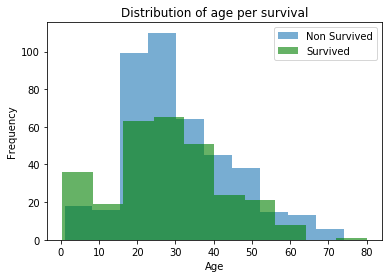

In [36]:
# Visualiza a distribuição das idades para cada valor único de sobrevivência
df_nsurvived['age'].hist(grid = False, label='Non Survived', alpha = 0.6);
df_survived['age'].hist(alpha = 0.6, grid = False, label='Survived', color='g');
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.title('Distribution of age per survival');
plt.legend();

### Idade e sobrevivência
Quando comparadas, as médias de idade para sobreviventes e não sobreviventes são **discretamente diferentes**.
Ambas as distribuições das idades são **deslocadas para direita** (i.e., valores acima da mediana são mais frequentes). 
As idades dos sobreviventes apresentam maior achatamento (menor curtose) e maior frequência de idades menores, em relação aos não sobreviventes. 

**Interpretação:** Crianças comumente são prioridades no embarque dos botes salva-vidas. Isso provavelmente levou a diminuição na média de idade observada para os sobreviventes. Para as idades acima dos 18 anos, quase sempre os sobreviventes estão em menor frequência.

**Obs:** Entre as médias, a diferença de 3 anos *pode* ser fruto do acaso. Somente um teste estatístico poderia rejeitar essa hipótese. 

In [37]:
# Atribui a proporção de sobreviventes dos valores únicos de sexo a um objeto para uso no histograma
sex_surv = prop('sex', 1)
sex_surv

female    0.677083
male      0.322917
Name: sex, dtype: float64

In [38]:
# Atribui a proporção de não sobreviventes de homens e mulheres a um objeto para uso no histograma
sex_nsurv = prop('sex', 0)
sex_nsurv

male      0.849057
female    0.150943
Name: sex, dtype: float64

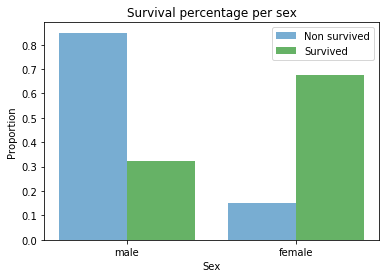

In [39]:
# Visualização para cada sexo
plt.bar(sex_nsurv.index, sex_nsurv, label = 'Non survived', align = 'edge', width = -0.4, alpha = 0.6);
plt.bar(sex_surv.index, sex_surv, label = 'Survived', align = 'edge', width = 0.4, alpha = 0.6, color = 'g');
plt.xlabel('Sex');
plt.ylabel('Proportion');
plt.legend();
plt.title('Survival percentage per sex');

### Sexo e sobrevivência
O gráfico acima mostra que as **mulheres compõem 68% do total de sobreviventes**. Do total de **não sobreviventes, os homens compõem a marca de 85%**. Essa distribuição sugere que, apesar do número absoluto muito maior de passageiros homens, quando se trata do aspecto da sobrevivência, as mulheres estão em maior quantidade, o que dificilmente seria explicado pelo acaso (um teste estatístico confirmaria essa hipótese).

**Interpretação:** O fato de mulheres e crianças embarcarem antes nos bote salva vidas pode ter sido um fator determinante nesses resultados<sup>3</sup>.

**Obs:** A proporção de homens não sobreviventes provavelmente é maior, se considerarmos que esses são dados apenas de passageiros, excluindo os tripulantes, que eram majoritariamente homens.

In [40]:
# Objeto que armazena a função prop aplicada à classe de passaporte dos sobreviventes
pclass_surv = prop('pclass', 1)
pclass_surv

1    0.416667
3    0.295139
2    0.288194
Name: pclass, dtype: float64

In [41]:
# Armazena a função prop aplicado à classe de passaporte dos não sobreviventes
pclass_nsurv = prop('pclass', 0)
pclass_nsurv

3    0.636792
2    0.212264
1    0.150943
Name: pclass, dtype: float64

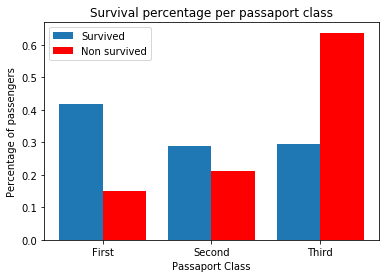

In [42]:
# Cria gráfico de barras com a proporção de sobreviventes das três classes de passaporte
plt.bar(pclass_surv.index, pclass_surv, width = -0.4, align = 'edge', label = 'Survived');
plt.bar(pclass_nsurv.index, pclass_nsurv, color = 'r', align = 'edge', width = 0.4, label = 'Non survived');
plt.xlabel('Passaport Class');
plt.xticks([1, 2, 3], ['First', 'Second', 'Third'])
plt.ylabel('Percentage of passengers');
plt.legend();
plt.title('Survival percentage per passaport class');

### Classe do passaporte e sobrevivência

O gráfico de barras acima demonstra que os sobreviventes apresentam **classes de passaporte 1, 2 e 3 em proporções relativamente similares**, ao passo que os não sobreviventes apresentam uma **grande proporção (63%) de classes de passaporte do tipo 3**, que representa um *status* socioeconômico menos privilegiado em relação aos outros. 

**Hipótese:** esse resultado pode estar ligado com o fato dos passageiros de terceira classe serem majoritariamente imigrantes<sup>x</sup>, e provavelmente estarem acompanhados de mais familiares. A análise abaixo busca verificar esse dado.

In [43]:
# Cria objeto com a proporção de irmãos/cônjugues dos passageiros não sobreviventes
pclass_sibsp = df_nsurvived.groupby('pclass').sum()['sibsp']/df_nsurvived['sibsp'].sum()
pclass_sibsp

pclass
1    0.103139
2    0.139013
3    0.757848
Name: sibsp, dtype: float64

In [44]:
# Cria objeto com a proporção de pais/filhos dos passageiros não sobreviventes
pclass_parch = df_nsurvived.groupby('pclass').sum()['parch']/df_nsurvived['parch'].sum()
pclass_parch

pclass
1    0.154839
2    0.090323
3    0.754839
Name: parch, dtype: float64

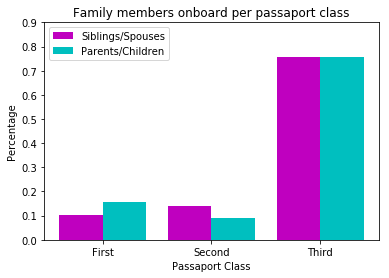

In [45]:
# Cria gráfico de barras com a proporção de familiares das três classes de passaporte
plt.bar(pclass_sibsp.index, pclass_sibsp, color = 'm', width = -0.4, align = 'edge', label = 'Siblings/Spouses');
plt.bar(pclass_parch.index, pclass_parch, color = 'c', align = 'edge', width = 0.4, label = 'Parents/Children');
plt.xticks([1,2,3], ['First', 'Second', 'Third'])
plt.xlabel('Passaport Class');
plt.ylim(0, 0.9);
plt.ylabel('Percentage');
plt.legend();
plt.title('Family members onboard per passaport class');

### Classe do passaporte e presença de familiares

O gráfico acima mostra que os passageiros da terceira classe (com maior proporção de não sobreviventes) eram os que mais estavam acompanhados de familiares. Do total de familiares, **76% de irmãos/cônjugues e 75% de pais/filhos eram de passageiros da terceira classe**. 

**Interpretação:** Estar acompanhado de um maior número de familiares pode ter dificultado no processo de evasão, considerando que os quartos da terceira classe eram menores<sup>4</sup>, tendo maior densidade de passageiros. Adicionalmente, a política de imigração dos EUA determinava que um portão isolasse, de certa maneira, os imigrantes da terceira classe do restante dos passageiros<sup>5</sup>, por uma questão de segurança. Esse fator pode ter, igualmente, dificultado a evasão da terceira classe das regiões mais profundas do Titanic.

## 2. Qual o perfil dos passageiros de cada porto de embarque?

In [47]:
# Separa o DataFrame dos passageiros de cada embarcação em três 
dfq = df.query('embarked == "Q"')
dfc = df.query('embarked == "C"')
dfs = df.query('embarked == "S"')

In [48]:
# Armazena a média de idade dos passageiros de cada embarcação
emb_age = df.groupby('embarked').mean()['age']
emb_age

embarked
C    30.814769
Q    28.089286
S    29.445397
Name: age, dtype: float64

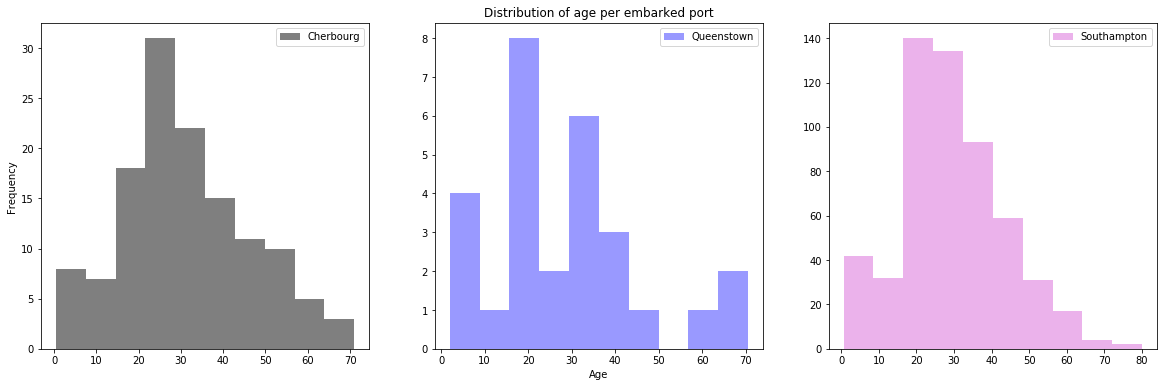

In [49]:
# Cria subplots com as distribuições de idade usando os DataFrames de cada embarcação 

plt.figure(figsize=(20,6));

plt.subplot(1,3,1);
dfc['age'].hist(grid = False, alpha = 0.5, label='Cherbourg', color='k');
plt.ylabel('Frequency');
plt.legend();

plt.subplot(1,3,2);
dfq['age'].hist(alpha = 0.4, grid = False, label='Queenstown', color='b');
plt.xlabel('Age');
plt.legend();
plt.title('Distribution of age per embarked port');

plt.subplot(1,3,3);
dfs['age'].hist(alpha = 0.3, grid = False, label='Southampton', color='m');
plt.legend();

As distribuições acima mostram que, em média, os **passageiros de Cherbourg eram ligeiramente mais velhos** em relação aos outros portos. Em Southampton teve a embarcação da maior parte dos passageiros, seguido por Cherbourg e, com menor contribuição, Queenstown. Sobre o último, é possível verificar uma distribuição polimodal, com picos de frequência em faixas de idade distintas. Em especial, **a faixa de até 10 anos de idade na embarcação de Queenstown é relativamente alta**, o que sugere maior número de familias e/ou imigrantes (padrão observado na Pergunta 1).

In [50]:
# Cria objeto com a contagem de sobreviventes por embarcação
emb_surv = df.groupby(['embarked', 'survived']).count()['name']

# Armazena a proporção de sobreviventes para as linhas de Cherbourg
emb_survC = emb_surv.C/emb_surv.C.sum()

# Armazena a proporção de sobreviventes para as linhas de Queenstown
emb_survQ = emb_surv.Q/emb_surv.Q.sum()

# Armazena a proporção de sobreviventes para as linhas de Southampton
emb_survS = emb_surv.S/emb_surv.S.sum()

# Imprimi os resultados
print("Porcentagem de sobreviventes \n\nCherbourg: \n{0} \n\nQueenstown: \n{1} \n\nSouthampton: \n{2}".format(emb_survC, emb_survQ, emb_survS))

Porcentagem de sobreviventes 

Cherbourg: 
survived
0    0.392308
1    0.607692
Name: name, dtype: float64 

Queenstown: 
survived
0    0.714286
1    0.285714
Name: name, dtype: float64 

Southampton: 
survived
0    0.637184
1    0.362816
Name: name, dtype: float64


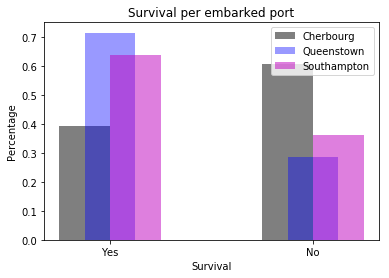

In [51]:
# Cria gráfico de barras com a proporção de sobreviventes das três embarcações

plt.bar(emb_survC.index, emb_survC, color = 'k', align = 'edge', width = -0.25, alpha=0.5, label = 'Cherbourg');
plt.bar(emb_survQ.index, emb_survQ, color = 'b', align = 'center', width = 0.25, alpha=0.4, label = 'Queenstown');
plt.bar(emb_survS.index, emb_survS, color = 'm', align = 'edge', width = 0.25, alpha=0.5, label = 'Southampton');
plt.xlabel('Survival');
plt.ylabel('Percentage');
plt.xticks([0, 1],['Yes', 'No'])
plt.title('Survival per embarked port');
plt.legend();

A partir do gráfico de barras acima, a porcentagem de **não sobreviventes foi maior para passageiros de Queenstown (71%), seguido dos de Southampton (63%)**. Isso é, mais da metade morreram para ambas as embarcações. Por outro lado, **mais da metade dos passageiros de Cherbourg (60%) sobreviveram à catástrofe**. Essa taxa de sobrevivência relativamente alta pode estar relacionada, como observado na Pergunta 1, com a classe social/do passaporte. Uma análise futura buscou verificar essa hipótese.

In [52]:
# Armazena a contagem de homens e mulheres para cada embarcação
emb_sex = df.groupby(['embarked', 'sex']).count()['name']
emb_sex

embarked  sex   
C         female     61
          male       69
Q         female     12
          male       16
S         female    186
          male      368
Name: name, dtype: int64

Seguindo a tendência do conjunto total, todos os portos tiveram **maior quantidade de homens do que mulheres** em suas embarcações. Uma vez que esse padrão já está refletido em um gráfico da primeira pergunta, não foi realizado um gráfico para ilustrar o mesmo padrão.

In [53]:
# Armazena a contagem de cada classe de passaporte das três embarcação
emb_pclass = df.groupby(['embarked', 'pclass']).count()['survived']
emb_pclass

embarked  pclass
C         1          74
          2          15
          3          41
Q         1           2
          2           2
          3          24
S         1         108
          2         156
          3         290
Name: survived, dtype: int64

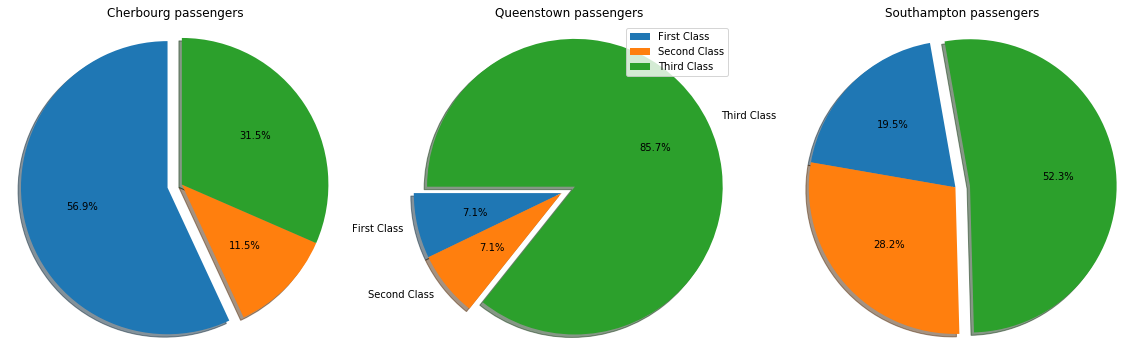

In [54]:
# Cria gráficos de setores, com a porcentagem de sobreviventes das três embarcações, em uma figura
labels = ['First Class', 'Second Class', 'Third Class']
plt.figure(figsize=(20,6));

plt.subplot(1,3,1);
plt.pie(emb_pclass.C, explode=(0.1,0,0), shadow=True, startangle =90, autopct='%1.1f%%');
plt.axis('equal');
plt.title('Cherbourg passengers');


plt.subplot(1,3,2)
plt.pie(emb_pclass.Q, explode=(0,0,0.1), shadow=True, startangle =180, autopct='%1.1f%%', labels=labels);
plt.axis('equal');
plt.title('Queenstown passengers');
plt.legend();

plt.subplot(1,3,3)
plt.pie(emb_pclass.S, explode=(0,0,0.1), shadow=True, startangle =100, autopct='%1.1f%%');
plt.axis('equal');
plt.title('Southampton passengers');

### Perfil dos passageiros de cada porto de embarque
A partir dos resultados acima, os passageiros de todas as embarcações apresentavam mais homens do que mulheres, na faixa de 30 anos. Os passageiros de **Southampton eram em grande número, distribuidos em classes sociais de modo mais equilibrado** em relação às outras embarcações (19,5% - 1 Classe; 28,2% - 2 Classe; 52,3% - 3 classe), em que **mais de 60% morreram no incidente**. Os passageiros de **Queenstown eram em menor número, com a maior proporção de crianças, majoritariamente (85,7%) da terceira classe, em que mais da metade (61%) também não sobreviveram**. Isso sugere que esta embarcação tenha sido de imigrantes, em sua maioria. Por fim, os passageiros de **Cherbourg eram em números medianos, em relação às outras duas embarcações, a maioria (56,9%) da primeira classe e que obtiveram as melhores taxas de sobrevivência (60%)**.

## 3. Quais familias sobreviveram ao incidente?

In [55]:
# Armazena o número de passageiros para cada família
number_family = df['family'].value_counts()

# Armazena o número de sobreviventes para cada família
surv_family = df.groupby('family').sum()['survived']

# Itera sobre a lista das familias e 
# cria uma lista com familias em que o número de indivíduos à bordo iguala o número de seus sobreviventes
family_alive = []
for family in df['family'].unique():
    if number_family[family] == surv_family[family]:
        family_alive.append(family)
    else:
        continue
    
print("{0} famílias tiveram todos seus integrantes vivos. \nSão elas: \n{1}".format(len(family_alive), family_alive))

189 famílias tiveram todos seus integrantes vivos. 
São elas: 
['Cumings', 'Heikkinen', 'Sandstrom', 'Bonnell', 'Hewlett', 'Beesley', 'McGowan', 'Sloper', 'Nicola-Yarred', 'Devaney', 'Faunthorpe', 'Rugg', 'Nye', 'Bing', 'Caldwell', 'Dowdell', 'Sheerlinck', 'Ilett', 'Greenfield', 'Doling', 'Salkjelsvik', 'Webber', 'Madsen', 'Weisz', 'Newsom', 'Nysten', 'Gilnagh', 'Watt', 'Becker', 'Kink-Heilmann', 'Romaine', 'Pinsky', 'Andersen-Jensen', 'Lurette', 'Cohen', 'Albimona', 'Carr', 'Blank', 'Cameron', 'Honkanen', 'Bazzani', 'Sunderland', 'Hoyt', 'Mellors', 'Hamalainen', 'Beckwith', 'Touma', 'Cherry', 'Ward', 'Parrish', 'Persson', 'Bissette', 'Tornquist', 'Mellinger', 'Dorking', 'de Mulder', 'Hosono', 'Connolly', 'Barber', 'Bishop', 'Francatelli', 'Hays', 'Ryerson', 'Nilsson', 'Wick', 'Spedden', 'Slayter', 'Young', 'Ball', 'Hippach', 'Burns', 'Dahl', 'Coutts', 'Bowerman', 'Warren', 'Aubart', 'Harder', 'Landergren', 'Bidois', 'Nakid', 'Buss', 'Lehmann', 'Jansson', 'Trout', 'Niskanen', 'Richards

In [56]:
# Armazena e imprimi a proporção de famílias que sobreviveram totalmente

family_alive_prop = round(len(family_alive)/len(df['family'].unique())*100, 1)
print("{}% das familias representadas no Titanic sobreviveram totalmente ao incidente".format(family_alive_prop))

35.5% das familias representadas no Titanic sobreviveram totalmente ao incidente


Assim, **pouco mais de 1/3 das familias que estavam à bordo do Titanic tiveram todos seus familiares poupados**. Se considerarmos apenas famílias com 4 ou mais integrantes à bordo, esse número provavelmente seria menor.

### VII. Referências

1. [IBM Medium - Markdown for Jupyter notebooks cheatsheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)
Sintaxe de células Markdown.


2. [Kaggle - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)
Especificações técnicas sobre os dados dos passageiros do Titanic utilizado no projeto.


3. [Geller, Judith B. (Outubro de 1998). Titanic: Women and Children First. (S.l.): W. W. Norton & Company. p. 197. ISBN 978-0-393-04666-3](https://www.amazon.com/Titanic-Children-Judith-B-Geller/dp/0393046664).
Sobre a prioridade de embarcação de mulheres e crianças nos botes salva-vidas.


4. [Wikipedia - Passengers od the RMS Titanic](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic#Third_class)
Informações sobre os passageiros e acomodações da terceira classe do Titanic.


5. [Matéria da BBC - Mitos sobre o Titanic](https://www.bbc.com/news/magazine-17515305)
Matéria que fala, entre outras coisas, sobre a política de imigração dos EUA e os portões que limitaram a circulação da terceira classe.


6. [Documentação do Matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html)